# 📊 Visualizador de Datos Sintéticos - DomusAI

Este notebook permite explorar y visualizar los datos sintéticos generados por el sistema DomusAI.

**Funcionalidades**:
- 📁 Carga de archivos CSV desde `output/`
- 📊 Visualización en tablas interactivas
- 📈 Gráficas de consumo energético
- 🔍 Análisis estadístico completo
- ⚙️ Filtrado y exploración de datos

---

## 1️⃣ Import Required Libraries

Importamos las librerías necesarias para análisis y visualización de datos.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings

# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✅ Librerías importadas correctamente")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
📦 Pandas version: 2.3.2
📦 NumPy version: 1.26.4


## 2️⃣ Listar Archivos Disponibles

Exploramos los archivos CSV generados en la carpeta `output/`.

In [14]:
# Listar archivos CSV en la carpeta output/
output_dir = Path('output')
csv_files = sorted(output_dir.glob('*.csv'), key=lambda x: x.stat().st_mtime, reverse=True)

print("📁 Archivos CSV disponibles:\n")
print("=" * 80)
for i, file in enumerate(csv_files, 1):
    size_kb = file.stat().st_size / 1024
    mod_time = datetime.fromtimestamp(file.stat().st_mtime).strftime('%Y-%m-%d %H:%M:%S')
    print(f"{i}. {file.name}")
    print(f"   Tamaño: {size_kb:.1f} KB | Modificado: {mod_time}")
    print("-" * 80)

if csv_files:
    print(f"\n✅ Total de archivos encontrados: {len(csv_files)}")
    latest_file = csv_files[0]
    print(f"📄 Archivo más reciente: {latest_file.name}")
else:
    print("⚠️  No se encontraron archivos CSV")

📁 Archivos CSV disponibles:

1. synthetic_90days_20251029_132500.csv
   Tamaño: 9036.0 KB | Modificado: 2025-10-29 13:25:01
--------------------------------------------------------------------------------

✅ Total de archivos encontrados: 1
📄 Archivo más reciente: synthetic_90days_20251029_132500.csv


## 3️⃣ Cargar Datos

Cargamos el archivo CSV más reciente y lo convertimos en un DataFrame de pandas.

In [15]:
# Cargar el archivo más reciente (o puedes especificar uno manualmente)
if csv_files:
    # Opción 1: Usar el archivo más reciente
    file_to_load = csv_files[0]
    
    # Opción 2: Descomentar para cargar un archivo específico
    # file_to_load = output_dir / 'synthetic_7days_20251029_122114.csv'
    
    print(f"🔄 Cargando: {file_to_load.name}")
    df = pd.read_csv(file_to_load)
    
    # Convertir Datetime a índice
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)
    
    print(f"✅ Datos cargados exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"📅 Rango de fechas: {df.index.min()} → {df.index.max()}")
    print(f"⏱️  Duración: {(df.index.max() - df.index.min()).days + 1} días")
else:
    print("❌ No hay archivos para cargar")

🔄 Cargando: synthetic_90days_20251029_132500.csv
✅ Datos cargados exitosamente
📊 Dimensiones: 129,600 filas × 7 columnas
📅 Rango de fechas: 2025-07-31 13:24:58.610964 → 2025-10-29 13:23:58.610964
⏱️  Duración: 90 días
✅ Datos cargados exitosamente
📊 Dimensiones: 129,600 filas × 7 columnas
📅 Rango de fechas: 2025-07-31 13:24:58.610964 → 2025-10-29 13:23:58.610964
⏱️  Duración: 90 días


In [16]:
# Mostrar las primeras 10 filas
print("📋 Primeras 10 filas del dataset:\n")
print("=" * 120)
display(df.head(10))

print("\n" + "=" * 120)
print("\n📋 Últimas 10 filas del dataset:\n")
print("=" * 120)
display(df.tail(10))

📋 Primeras 10 filas del dataset:



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2025-07-31 13:24:58.610964,1.184,0.132,235.454,5.030,0.249,0.275,0.063
2025-07-31 13:25:58.610964,1.219,0.179,230.145,5.295,0.343,0.047,0.050
2025-07-31 13:26:58.610964,1.241,0.135,233.225,5.319,0.291,0.071,0.181
2025-07-31 13:27:58.610964,1.338,0.217,239.153,5.596,0.204,0.305,0.078
2025-07-31 13:28:58.610964,1.404,0.191,236.385,5.940,0.004,0.161,0.393
2025-07-31 13:29:58.610964,1.023,0.175,228.937,4.469,0.168,0.290,0.114
2025-07-31 13:30:58.610964,0.987,0.111,239.316,4.122,0.274,0.156,0.268
2025-07-31 13:31:58.610964,1.084,0.155,238.723,4.542,0.317,0.210,0.012
2025-07-31 13:32:58.610964,1.354,0.231,233.300,5.805,0.158,0.254,0.024




📋 Últimas 10 filas del dataset:



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2025-10-29 13:14:58.610964,0.729,0.102,229.427,3.175,0.129,0.216,0.106
2025-10-29 13:15:58.610964,0.848,0.095,232.598,3.645,0.252,0.054,0.129
2025-10-29 13:16:58.610964,0.788,0.143,231.545,3.402,0.001,0.157,0.015
2025-10-29 13:17:58.610964,1.040,0.150,238.480,4.360,0.370,0.086,0.028
2025-10-29 13:18:58.610964,0.945,0.179,236.024,4.006,0.303,0.200,0.070
2025-10-29 13:19:58.610964,1.273,0.151,232.904,5.466,0.502,0.250,0.368
2025-10-29 13:20:58.610964,1.030,0.162,238.077,4.327,0.263,0.301,0.080
2025-10-29 13:21:58.610964,0.858,0.094,241.605,3.550,0.160,0.208,0.171
2025-10-29 13:22:58.610964,0.960,0.167,238.257,4.028,0.095,0.032,0.038


In [17]:
# Información general del DataFrame
print("🔍 Información del DataFrame:\n")
print("=" * 80)
df.info()
print("\n" + "=" * 80)
print(f"\n💾 Memoria total utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

🔍 Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129600 entries, 2025-07-31 13:24:58.610964 to 2025-10-29 13:23:58.610964
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    129600 non-null  float64
 1   Global_reactive_power  129600 non-null  float64
 2   Voltage                129600 non-null  float64
 3   Global_intensity       129600 non-null  float64
 4   Sub_metering_1         129600 non-null  float64
 5   Sub_metering_2         129600 non-null  float64
 6   Sub_metering_3         129600 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


💾 Memoria total utilizada: 8100.00 KB


In [18]:
# Estadísticas descriptivas (transpuestas para mejor lectura)
print("📊 Estadísticas descriptivas del dataset:\n")
print("=" * 120)
stats = df.describe().T
stats['range'] = stats['max'] - stats['min']
display(stats)

print("\n🔍 Observaciones:")
print(f"  • Global_active_power promedio: {df['Global_active_power'].mean():.3f} kW")
print(f"  • Voltaje promedio: {df['Voltage'].mean():.2f} V")
print(f"  • Intensidad promedio: {df['Global_intensity'].mean():.3f} A")
print(f"  • Suma promedio sub-meterings: {(df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']).mean():.3f} kW")

📊 Estadísticas descriptivas del dataset:



,count,mean,std,min,25%,50%,75%,max,range
Global_active_power,129600.000,1.994,1.950,0.100,0.495,1.179,3.097,19.617,19.517
Global_reactive_power,129600.000,0.299,0.304,0.010,0.073,0.175,0.458,3.575,3.565
Voltage,129600.000,234.942,4.894,220.000,231.613,234.984,238.346,245.000,25.000
Global_intensity,129600.000,8.490,8.306,0.408,2.104,5.021,13.194,82.625,82.217
Sub_metering_1,129600.000,0.400,0.507,0.000,0.063,0.194,0.511,6.519,6.519
Sub_metering_2,129600.000,0.299,0.379,0.000,0.047,0.146,0.383,4.519,4.519
Sub_metering_3,129600.000,0.299,0.380,0.000,0.047,0.146,0.381,4.800,4.800



🔍 Observaciones:
  • Global_active_power promedio: 1.994 kW
  • Voltaje promedio: 234.94 V
  • Intensidad promedio: 8.490 A
  • Suma promedio sub-meterings: 0.998 kW


In [19]:
# Ejemplo 1: Filtrar por consumo alto (>5 kW)
print("🔥 Registros con consumo alto (>5 kW):\n")
high_consumption = df[df['Global_active_power'] > 5.0]
print(f"Total registros: {len(high_consumption):,} ({len(high_consumption)/len(df)*100:.2f}%)")
print("\n" + "=" * 120)
display(high_consumption[['Global_active_power', 'Voltage', 'Global_intensity', 
                          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].head(10))

# Ejemplo 2: Filtrar por voltaje anormal (<225V o >240V)
print("\n⚠️  Registros con voltaje anormal:\n")
abnormal_voltage = df[(df['Voltage'] < 225) | (df['Voltage'] > 240)]
print(f"Total registros: {len(abnormal_voltage):,} ({len(abnormal_voltage)/len(df)*100:.2f}%)")
if len(abnormal_voltage) > 0:
    print("=" * 120)
    display(abnormal_voltage[['Voltage', 'Global_active_power']].head(10))

🔥 Registros con consumo alto (>5 kW):

Total registros: 17,677 (13.64%)



,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2025-07-31 18:10:58.610964,5.183,229.703,22.562,1.778,1.286,0.988
2025-07-31 18:11:58.610964,5.062,239.651,21.124,1.013,0.011,0.241
2025-07-31 18:16:58.610964,5.111,235.698,21.684,0.830,0.117,0.527
2025-07-31 18:22:58.610964,5.164,235.623,21.914,0.912,1.245,0.330
2025-07-31 18:24:58.610964,5.181,235.071,22.042,1.329,1.171,0.249
2025-07-31 18:34:58.610964,5.040,235.035,21.444,0.257,0.772,0.519
2025-07-31 18:37:58.610964,5.081,235.425,21.584,1.813,1.441,1.457
2025-07-31 18:38:58.610964,5.332,238.753,22.333,2.072,1.129,0.977
2025-07-31 18:43:58.610964,5.397,229.948,23.470,1.492,1.136,1.141



⚠️  Registros con voltaje anormal:

Total registros: 23,457 (18.10%)


,Voltage,Global_active_power
Datetime,,
2025-07-31 13:36:58.610964,241.001,0.908
2025-07-31 13:38:58.610964,245.000,1.155
2025-07-31 13:46:58.610964,240.635,1.246
2025-07-31 14:02:58.610964,242.729,1.162
2025-07-31 14:04:58.610964,224.704,0.690
2025-07-31 14:06:58.610964,240.935,1.064
2025-07-31 14:15:58.610964,241.386,1.285
2025-07-31 14:16:58.610964,243.985,1.171
2025-07-31 14:27:58.610964,242.697,0.980


## 6️⃣ Visualizaciones

Gráficas interactivas para análisis visual de los datos.

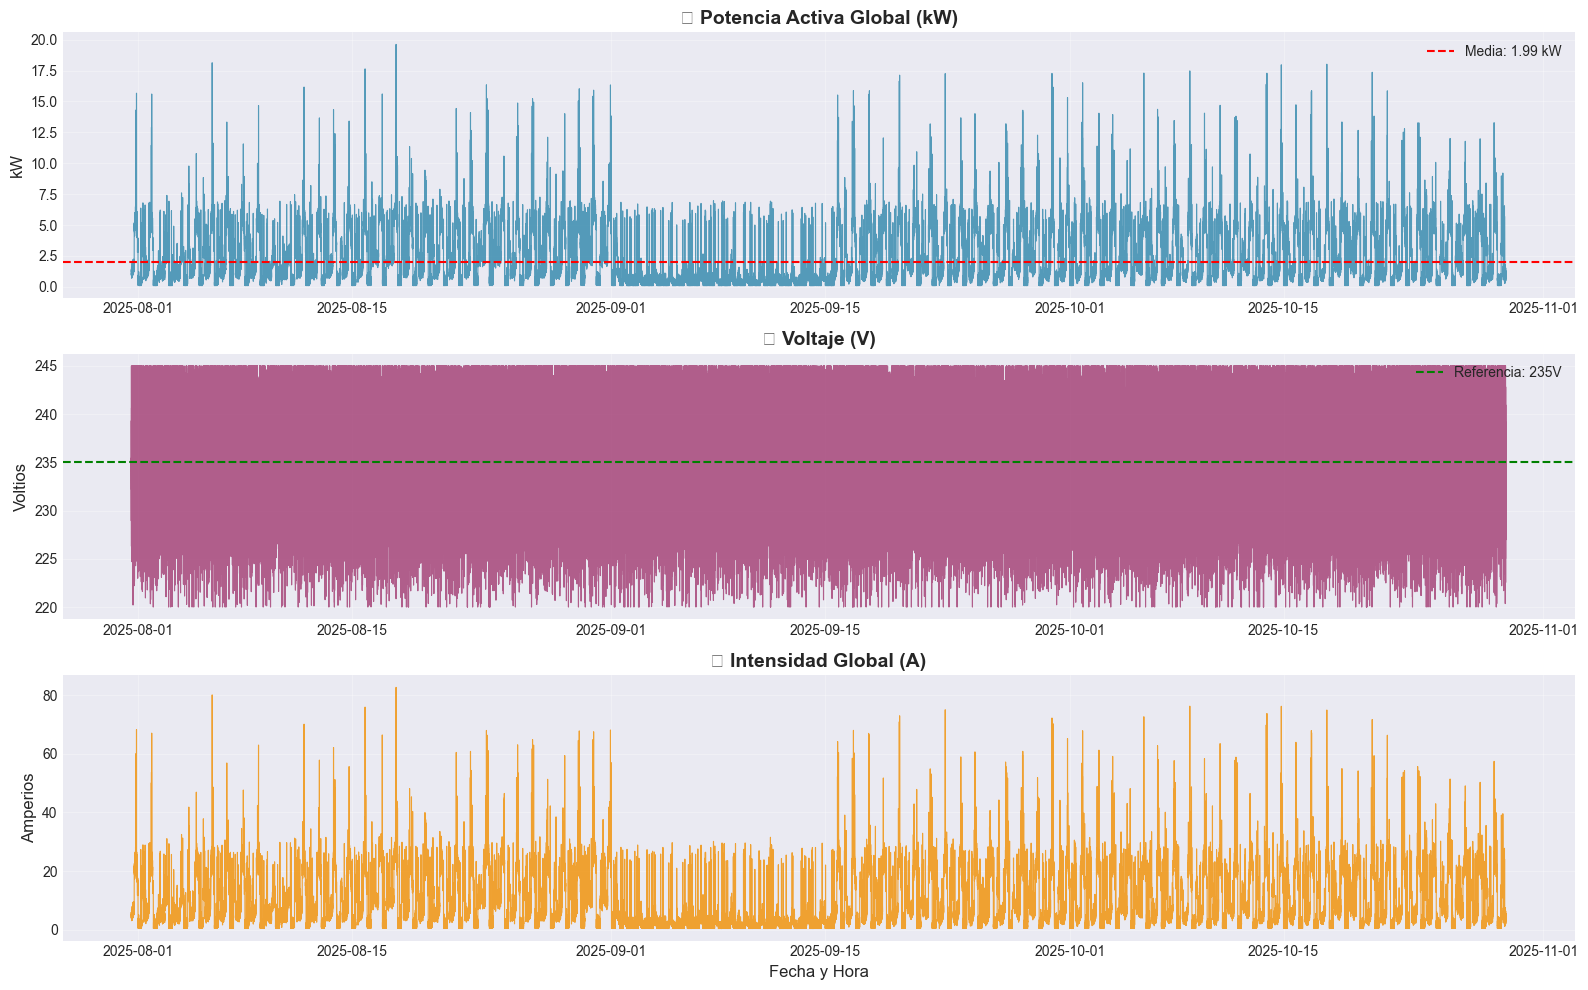

✅ Gráfica de serie temporal generada


In [20]:
# Gráfica de serie temporal del consumo
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Gráfica 1: Global_active_power
axes[0].plot(df.index, df['Global_active_power'], color='#2E86AB', linewidth=0.8, alpha=0.8)
axes[0].set_title('🔌 Potencia Activa Global (kW)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('kW', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=df['Global_active_power'].mean(), color='red', linestyle='--', 
                label=f'Media: {df["Global_active_power"].mean():.2f} kW', linewidth=1.5)
axes[0].legend(loc='upper right')

# Gráfica 2: Voltage
axes[1].plot(df.index, df['Voltage'], color='#A23B72', linewidth=0.8, alpha=0.8)
axes[1].set_title('⚡ Voltaje (V)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Voltios', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=235, color='green', linestyle='--', label='Referencia: 235V', linewidth=1.5)
axes[1].legend(loc='upper right')

# Gráfica 3: Global_intensity
axes[2].plot(df.index, df['Global_intensity'], color='#F18F01', linewidth=0.8, alpha=0.8)
axes[2].set_title('⚡ Intensidad Global (A)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Amperios', fontsize=12)
axes[2].set_xlabel('Fecha y Hora', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Gráfica de serie temporal generada")

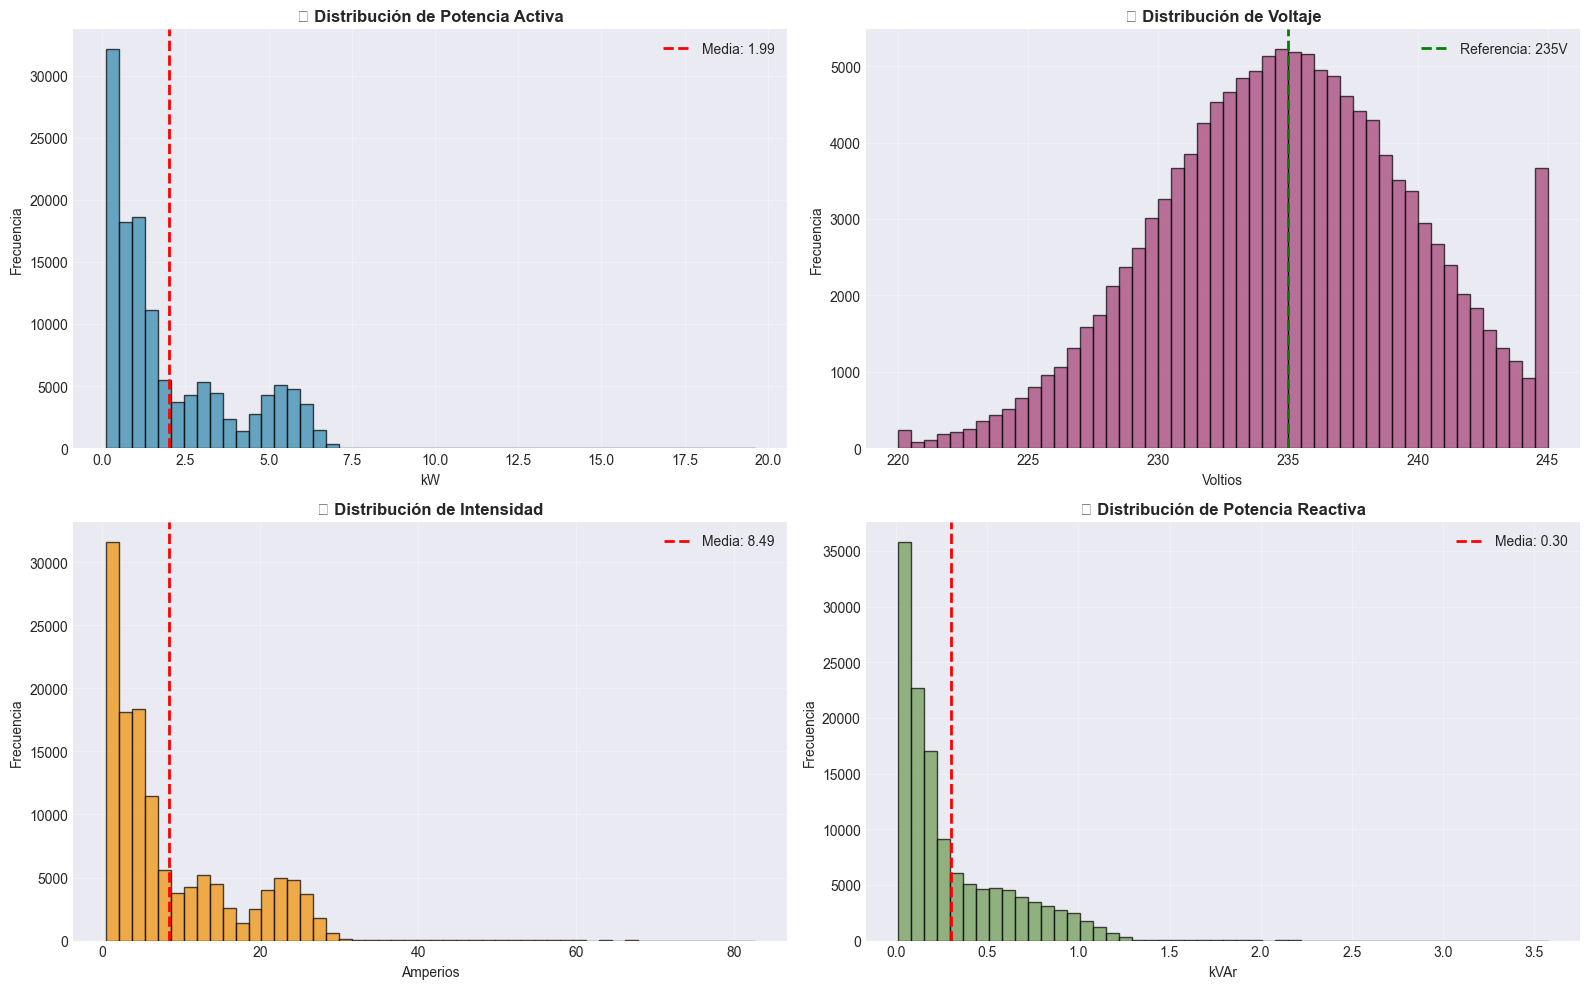

✅ Histogramas generados


In [21]:
# Histogramas de las variables principales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histograma 1: Global_active_power
axes[0, 0].hist(df['Global_active_power'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('🔌 Distribución de Potencia Activa', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('kW')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['Global_active_power'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_active_power"].mean():.2f}', linewidth=2)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histograma 2: Voltage
axes[0, 1].hist(df['Voltage'], bins=50, color='#A23B72', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('⚡ Distribución de Voltaje', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Voltios')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(235, color='green', linestyle='--', label='Referencia: 235V', linewidth=2)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Histograma 3: Global_intensity
axes[1, 0].hist(df['Global_intensity'], bins=50, color='#F18F01', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('⚡ Distribución de Intensidad', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Amperios')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df['Global_intensity'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_intensity"].mean():.2f}', linewidth=2)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Histograma 4: Global_reactive_power
axes[1, 1].hist(df['Global_reactive_power'], bins=50, color='#6A994E', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('🔋 Distribución de Potencia Reactiva', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('kVAr')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].axvline(df['Global_reactive_power'].mean(), color='red', linestyle='--', 
                    label=f'Media: {df["Global_reactive_power"].mean():.2f}', linewidth=2)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Histogramas generados")

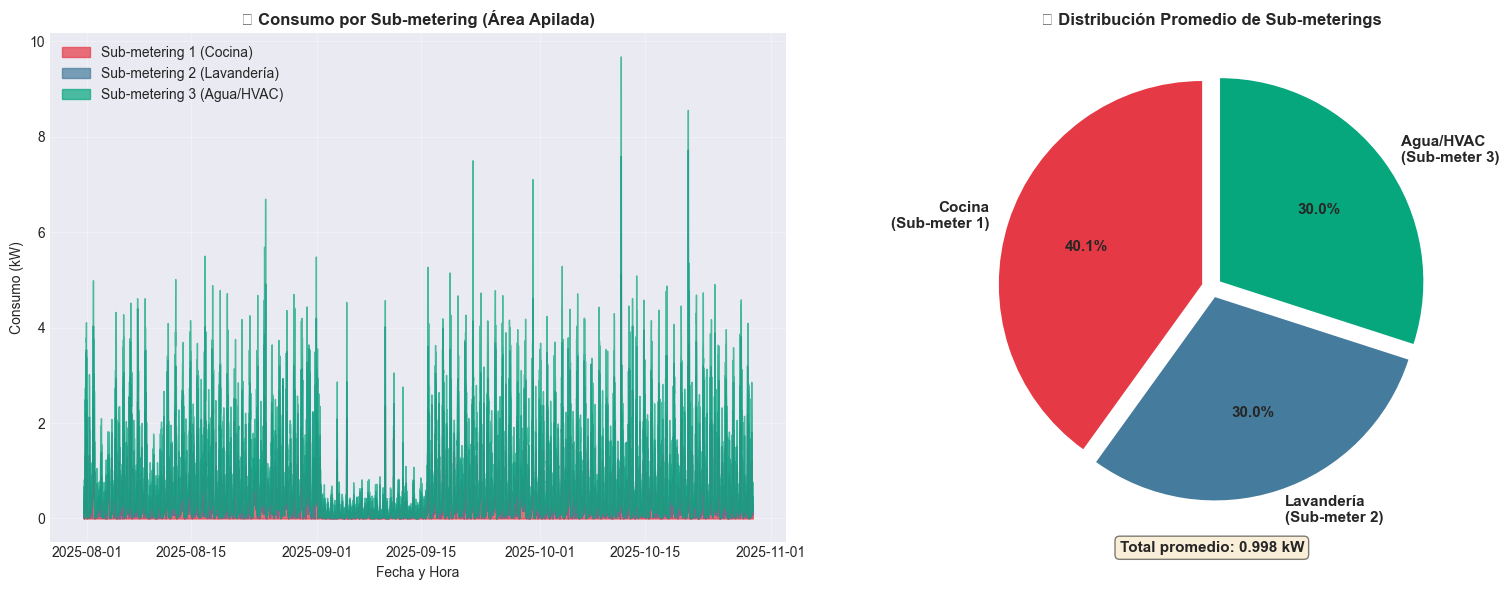

✅ Gráficas de sub-meterings generadas

📊 Resumen de consumo por sub-metering:
  • Cocina (Sub 1): 0.400 kW promedio (40.1%)
  • Lavandería (Sub 2): 0.299 kW promedio (30.0%)
  • Agua/HVAC (Sub 3): 0.299 kW promedio (30.0%)


In [22]:
# Análisis de sub-meterings
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Área apilada de sub-meterings a lo largo del tiempo
# Muestrear para mejorar rendimiento si hay muchos datos
sample_rate = max(1, len(df) // 5000)  # Máximo 5000 puntos
df_sample = df.iloc[::sample_rate]

axes[0].fill_between(df_sample.index, 0, df_sample['Sub_metering_1'], 
                      label='Sub-metering 1 (Cocina)', color='#E63946', alpha=0.7)
axes[0].fill_between(df_sample.index, df_sample['Sub_metering_1'], 
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'],
                      label='Sub-metering 2 (Lavandería)', color='#457B9D', alpha=0.7)
axes[0].fill_between(df_sample.index, 
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'],
                      df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'] + df_sample['Sub_metering_3'],
                      label='Sub-metering 3 (Agua/HVAC)', color='#06A77D', alpha=0.7)

axes[0].set_title('📊 Consumo por Sub-metering (Área Apilada)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha y Hora')
axes[0].set_ylabel('Consumo (kW)')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Gráfica 2: Gráfico de pastel con promedios
sub_avg = {
    'Cocina\n(Sub-meter 1)': df['Sub_metering_1'].mean(),
    'Lavandería\n(Sub-meter 2)': df['Sub_metering_2'].mean(),
    'Agua/HVAC\n(Sub-meter 3)': df['Sub_metering_3'].mean()
}

colors_pie = ['#E63946', '#457B9D', '#06A77D']
explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = axes[1].pie(sub_avg.values(), labels=sub_avg.keys(), 
                                         autopct='%1.1f%%', startangle=90,
                                         colors=colors_pie, explode=explode,
                                         textprops={'fontsize': 11, 'weight': 'bold'})

axes[1].set_title('🍰 Distribución Promedio de Sub-meterings', fontsize=12, fontweight='bold')

# Añadir valores absolutos en el centro
total_sub = sum(sub_avg.values())
axes[1].text(0, -1.3, f'Total promedio: {total_sub:.3f} kW', 
             ha='center', fontsize=11, weight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Gráficas de sub-meterings generadas")
print(f"\n📊 Resumen de consumo por sub-metering:")
print(f"  • Cocina (Sub 1): {df['Sub_metering_1'].mean():.3f} kW promedio ({df['Sub_metering_1'].mean()/total_sub*100:.1f}%)")
print(f"  • Lavandería (Sub 2): {df['Sub_metering_2'].mean():.3f} kW promedio ({df['Sub_metering_2'].mean()/total_sub*100:.1f}%)")
print(f"  • Agua/HVAC (Sub 3): {df['Sub_metering_3'].mean():.3f} kW promedio ({df['Sub_metering_3'].mean()/total_sub*100:.1f}%)")

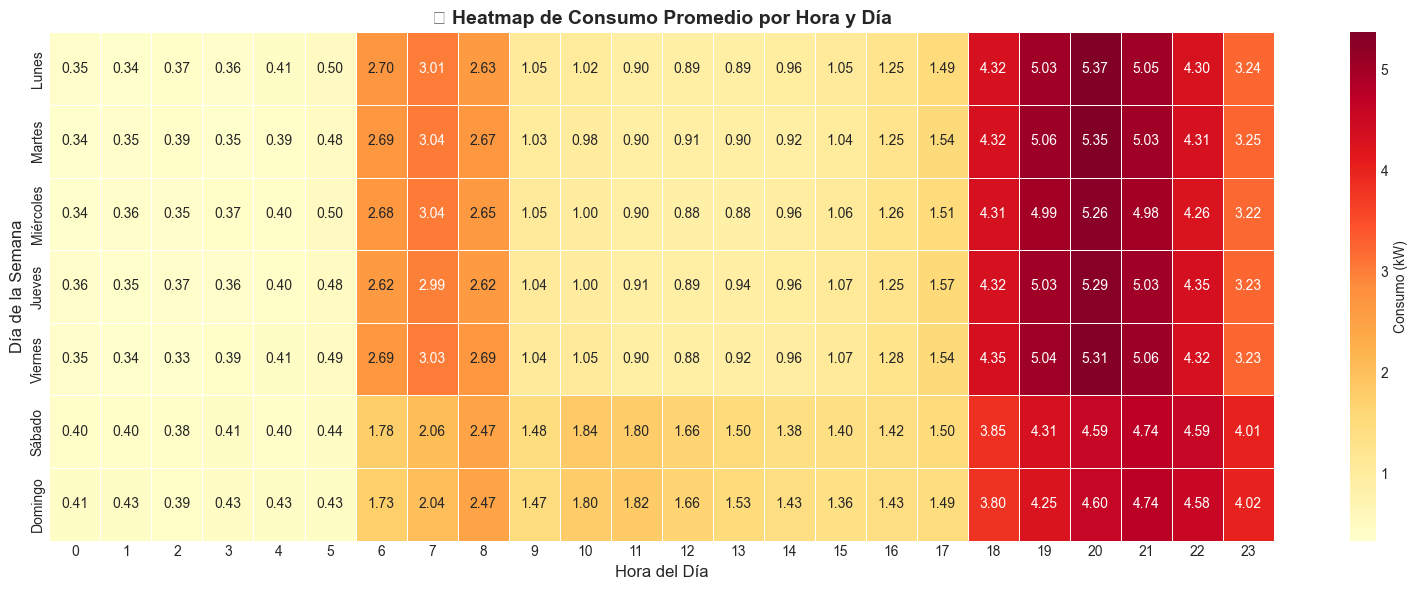

✅ Heatmap de patrones temporales generado

📊 Insights:
  • Hora de mayor consumo promedio: Lunes a las 20:00h
  • Día de mayor consumo promedio: Sábado


In [23]:
# Crear heatmap de consumo por hora del día y día de la semana
df_temp = df.copy()
df_temp['hour'] = df_temp.index.hour
df_temp['day_of_week'] = df_temp.index.dayofweek
df_temp['day_name'] = df_temp.index.day_name()

# Crear tabla pivot
pivot_table = df_temp.pivot_table(
    values='Global_active_power',
    index='day_of_week',
    columns='hour',
    aggfunc='mean'
)

# Nombres de días en español
day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
pivot_table.index = [day_names[i] if i < len(pivot_table) else f'Día {i}' for i in pivot_table.index]

# Crear heatmap
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Consumo (kW)'}, linewidths=0.5, ax=ax)

ax.set_title('🔥 Heatmap de Consumo Promedio por Hora y Día', fontsize=14, fontweight='bold')
ax.set_xlabel('Hora del Día', fontsize=12)
ax.set_ylabel('Día de la Semana', fontsize=12)

plt.tight_layout()
plt.show()

print("✅ Heatmap de patrones temporales generado")
print(f"\n📊 Insights:")
print(f"  • Hora de mayor consumo promedio: {pivot_table.max(axis=1).idxmax()} a las {pivot_table.max().idxmax()}:00h")
print(f"  • Día de mayor consumo promedio: {pivot_table.mean(axis=1).idxmax()}")

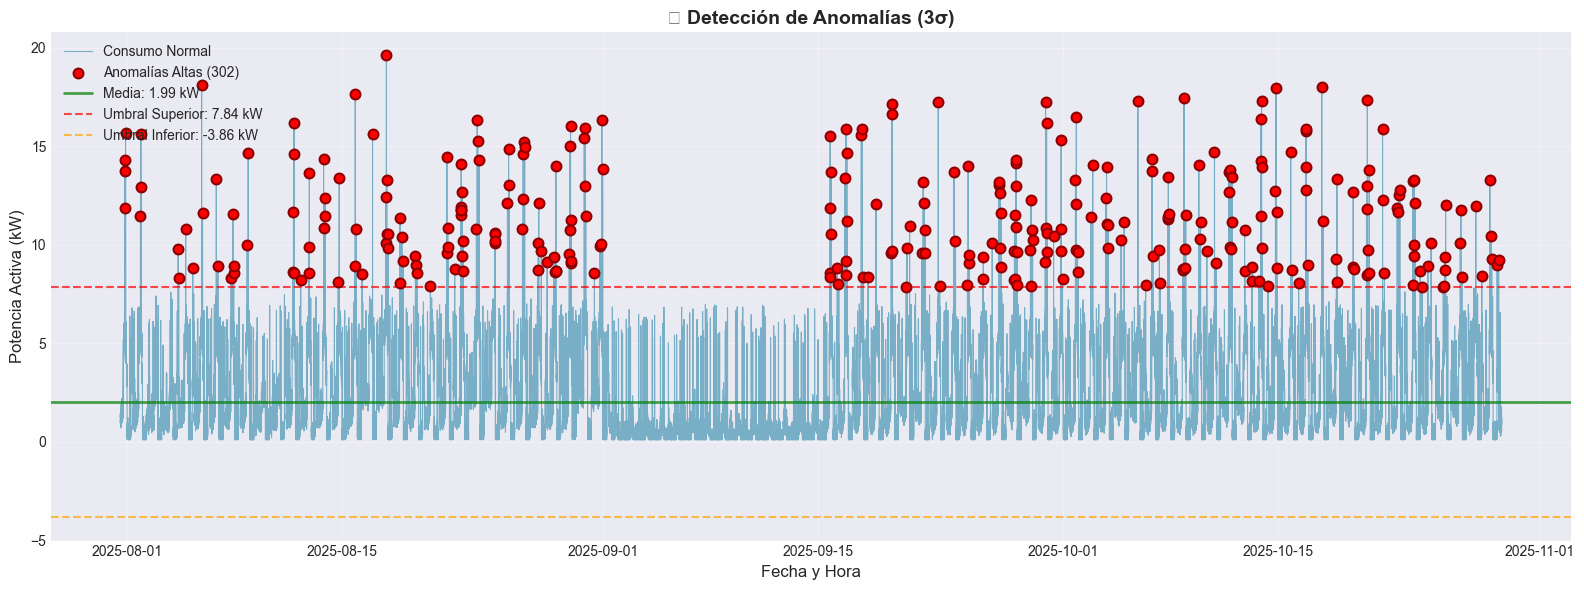

✅ Análisis de anomalías completado

📊 Resumen de anomalías detectadas:
  • Anomalías altas (>7.84 kW): 302 (0.23%)
  • Anomalías bajas (<-3.86 kW): 0 (0.00%)
  • Total de anomalías: 302 (0.23%)

🔥 Top 5 consumos más altos:
  • 2025-08-17 21:30:58.610964: 19.617 kW
  • 2025-08-05 20:31:58.610964: 18.131 kW
  • 2025-10-17 20:04:58.610964: 18.015 kW
  • 2025-10-14 20:31:58.610964: 17.964 kW
  • 2025-08-15 20:47:58.610964: 17.635 kW


In [24]:
# Detección simple de anomalías usando desviación estándar
mean_power = df['Global_active_power'].mean()
std_power = df['Global_active_power'].std()

# Definir umbral: 3 desviaciones estándar
threshold_high = mean_power + (3 * std_power)
threshold_low = mean_power - (3 * std_power)

# Identificar anomalías
anomalies_high = df[df['Global_active_power'] > threshold_high]
anomalies_low = df[df['Global_active_power'] < threshold_low]

# Visualizar
fig, ax = plt.subplots(figsize=(16, 6))

# Datos normales
ax.plot(df.index, df['Global_active_power'], color='#2E86AB', 
        linewidth=0.8, alpha=0.6, label='Consumo Normal')

# Resaltar anomalías
if len(anomalies_high) > 0:
    ax.scatter(anomalies_high.index, anomalies_high['Global_active_power'], 
               color='red', s=50, marker='o', label=f'Anomalías Altas ({len(anomalies_high)})', 
               zorder=5, edgecolors='darkred', linewidths=1.5)

if len(anomalies_low) > 0:
    ax.scatter(anomalies_low.index, anomalies_low['Global_active_power'], 
               color='orange', s=50, marker='o', label=f'Anomalías Bajas ({len(anomalies_low)})', 
               zorder=5, edgecolors='darkorange', linewidths=1.5)

# Líneas de umbral
ax.axhline(y=mean_power, color='green', linestyle='-', 
           label=f'Media: {mean_power:.2f} kW', linewidth=2, alpha=0.7)
ax.axhline(y=threshold_high, color='red', linestyle='--', 
           label=f'Umbral Superior: {threshold_high:.2f} kW', linewidth=1.5, alpha=0.7)
ax.axhline(y=threshold_low, color='orange', linestyle='--', 
           label=f'Umbral Inferior: {threshold_low:.2f} kW', linewidth=1.5, alpha=0.7)

ax.set_title('🚨 Detección de Anomalías (3σ)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha y Hora', fontsize=12)
ax.set_ylabel('Potencia Activa (kW)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análisis de anomalías completado")
print(f"\n📊 Resumen de anomalías detectadas:")
print(f"  • Anomalías altas (>{threshold_high:.2f} kW): {len(anomalies_high)} ({len(anomalies_high)/len(df)*100:.2f}%)")
print(f"  • Anomalías bajas (<{threshold_low:.2f} kW): {len(anomalies_low)} ({len(anomalies_low)/len(df)*100:.2f}%)")
print(f"  • Total de anomalías: {len(anomalies_high) + len(anomalies_low)} ({(len(anomalies_high) + len(anomalies_low))/len(df)*100:.2f}%)")

if len(anomalies_high) > 0:
    print(f"\n🔥 Top 5 consumos más altos:")
    top_5 = anomalies_high.nlargest(5, 'Global_active_power')
    for idx, row in top_5.iterrows():
        print(f"  • {idx}: {row['Global_active_power']:.3f} kW")

In [25]:
# Resumen final del análisis
print("=" * 100)
print("📊 RESUMEN FINAL DEL ANÁLISIS - DomusAI")
print("=" * 100)

print(f"\n📁 Archivo analizado: {file_to_load.name}")
print(f"📅 Período: {df.index.min()} → {df.index.max()}")
print(f"⏱️  Duración: {(df.index.max() - df.index.min()).days + 1} días ({len(df):,} registros)")

print(f"\n🔌 CONSUMO ELÉCTRICO:")
print(f"  • Potencia activa promedio: {df['Global_active_power'].mean():.3f} kW")
print(f"  • Potencia activa máxima: {df['Global_active_power'].max():.3f} kW")
print(f"  • Potencia activa mínima: {df['Global_active_power'].min():.3f} kW")
print(f"  • Desviación estándar: {df['Global_active_power'].std():.3f} kW")

# Calcular consumo total (integración numérica aproximada)
# Asumiendo intervalos de 1 minuto
interval_hours = 1/60  # 1 minuto = 1/60 hora
total_kwh = (df['Global_active_power'].sum() * interval_hours)
print(f"  • Consumo total estimado: {total_kwh:.2f} kWh")

print(f"\n⚡ PARÁMETROS ELÉCTRICOS:")
print(f"  • Voltaje promedio: {df['Voltage'].mean():.2f} V")
print(f"  • Intensidad promedio: {df['Global_intensity'].mean():.3f} A")
print(f"  • Potencia reactiva promedio: {df['Global_reactive_power'].mean():.3f} kVAr")

print(f"\n📊 SUB-METERINGS (kW):")
total_sub = (df['Sub_metering_1'].mean() + df['Sub_metering_2'].mean() + df['Sub_metering_3'].mean())
print(f"  • Cocina (Sub-meter 1): {df['Sub_metering_1'].mean():.3f} kW ({df['Sub_metering_1'].mean()/total_sub*100:.1f}%)")
print(f"  • Lavandería (Sub-meter 2): {df['Sub_metering_2'].mean():.3f} kW ({df['Sub_metering_2'].mean()/total_sub*100:.1f}%)")
print(f"  • Agua/HVAC (Sub-meter 3): {df['Sub_metering_3'].mean():.3f} kW ({df['Sub_metering_3'].mean()/total_sub*100:.1f}%)")
print(f"  • Total sub-meterings: {total_sub:.3f} kW")
print(f"  • Porcentaje del consumo total: {total_sub/df['Global_active_power'].mean()*100:.1f}%")

print(f"\n🚨 ANOMALÍAS DETECTADAS:")
print(f"  • Anomalías altas: {len(anomalies_high)} registros ({len(anomalies_high)/len(df)*100:.2f}%)")
print(f"  • Anomalías bajas: {len(anomalies_low)} registros ({len(anomalies_low)/len(df)*100:.2f}%)")

print(f"\n⏰ PATRONES TEMPORALES:")
hourly_consumption = df.groupby(df.index.hour)['Global_active_power'].mean()
peak_hour = hourly_consumption.idxmax()
low_hour = hourly_consumption.idxmin()
print(f"  • Hora pico de consumo: {peak_hour}:00h ({hourly_consumption.max():.3f} kW)")
print(f"  • Hora de mínimo consumo: {low_hour}:00h ({hourly_consumption.min():.3f} kW)")

print("\n" + "=" * 100)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 100)

📊 RESUMEN FINAL DEL ANÁLISIS - DomusAI

📁 Archivo analizado: synthetic_90days_20251029_132500.csv
📅 Período: 2025-07-31 13:24:58.610964 → 2025-10-29 13:23:58.610964
⏱️  Duración: 90 días (129,600 registros)

🔌 CONSUMO ELÉCTRICO:
  • Potencia activa promedio: 1.994 kW
  • Potencia activa máxima: 19.617 kW
  • Potencia activa mínima: 0.100 kW
  • Desviación estándar: 1.950 kW
  • Consumo total estimado: 4306.04 kWh

⚡ PARÁMETROS ELÉCTRICOS:
  • Voltaje promedio: 234.94 V
  • Intensidad promedio: 8.490 A
  • Potencia reactiva promedio: 0.299 kVAr

📊 SUB-METERINGS (kW):
  • Cocina (Sub-meter 1): 0.400 kW (40.1%)
  • Lavandería (Sub-meter 2): 0.299 kW (30.0%)
  • Agua/HVAC (Sub-meter 3): 0.299 kW (30.0%)
  • Total sub-meterings: 0.998 kW
  • Porcentaje del consumo total: 50.1%

🚨 ANOMALÍAS DETECTADAS:
  • Anomalías altas: 302 registros (0.23%)
  • Anomalías bajas: 0 registros (0.00%)

⏰ PATRONES TEMPORALES:
  • Hora pico de consumo: 20:00h (5.108 kW)
  • Hora de mínimo consumo: 0:00h (0.365

## 7️⃣ Resumen Final

Conclusiones y métricas clave del análisis.

### 🔍 Detección de Anomalías Visuales

Identificación visual de posibles anomalías en el consumo.

### ⏰ Patrones Temporales (Heatmap por Hora)

### 🍰 Desglose de Sub-meterings

### 📊 Distribuciones y Histogramas

### 📈 Serie Temporal de Consumo

In [26]:
# Ejemplo 3: Análisis por hora del día
print("⏰ Consumo promedio por hora del día:\n")
df_hourly = df.copy()
df_hourly['hour'] = df_hourly.index.hour
hourly_avg = df_hourly.groupby('hour')['Global_active_power'].mean().sort_index()

print("=" * 80)
for hour, consumption in hourly_avg.items():
    bar_length = int(consumption * 10)
    bar = '█' * bar_length
    print(f"{hour:02d}:00 | {bar} {consumption:.3f} kW")
print("=" * 80)

print(f"\n🔝 Pico de consumo: {hourly_avg.idxmax()}:00h ({hourly_avg.max():.3f} kW)")
print(f"🔽 Mínimo consumo: {hourly_avg.idxmin()}:00h ({hourly_avg.min():.3f} kW)")

⏰ Consumo promedio por hora del día:

00:00 | ███ 0.365 kW
01:00 | ███ 0.368 kW
02:00 | ███ 0.370 kW
03:00 | ███ 0.382 kW
04:00 | ████ 0.407 kW
05:00 | ████ 0.474 kW
06:00 | ████████████████████████ 2.411 kW
07:00 | ███████████████████████████ 2.740 kW
08:00 | █████████████████████████ 2.600 kW
09:00 | ███████████ 1.167 kW
10:00 | ████████████ 1.245 kW
11:00 | ███████████ 1.166 kW
12:00 | ███████████ 1.114 kW
13:00 | ██████████ 1.083 kW
14:00 | ██████████ 1.083 kW
15:00 | ███████████ 1.150 kW
16:00 | █████████████ 1.304 kW
17:00 | ███████████████ 1.519 kW
18:00 | █████████████████████████████████████████ 4.181 kW
19:00 | ████████████████████████████████████████████████ 4.814 kW
20:00 | ███████████████████████████████████████████████████ 5.108 kW
21:00 | █████████████████████████████████████████████████ 4.948 kW
22:00 | ███████████████████████████████████████████ 4.387 kW
23:00 | ██████████████████████████████████ 3.460 kW

🔝 Pico de consumo: 20:00h (5.108 kW)
🔽 Mínimo consumo: 0:00h (0

## 5️⃣ Filtrar y Analizar Datos

Ejemplos de cómo filtrar y analizar subconjuntos de datos.

### 📈 Estadísticas Descriptivas

### 📊 Información del Dataset

## 4️⃣ Visualizar Datos en Tabla

Mostramos las primeras y últimas filas del dataset para inspección visual.